# Zajęcie 3 (2024)

# PCA i wizualizacja skupień

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


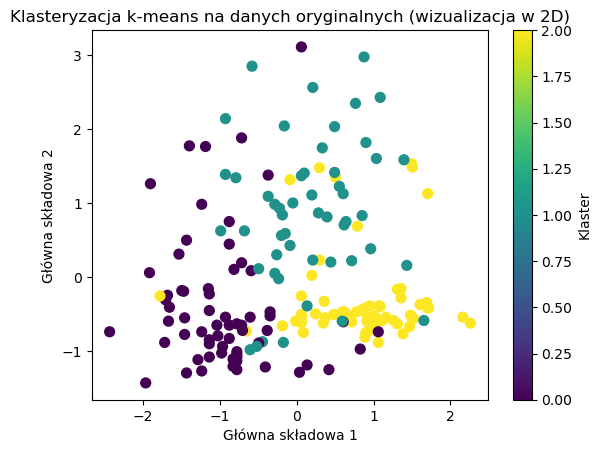

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


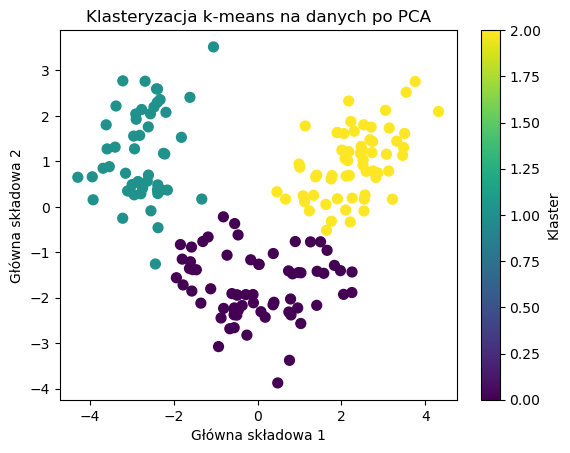

In [30]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()
data = wine.data
y = wine.target
#features = wine.feature_names

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Analiza PCA
#pca = PCA()
#data_pca = pca.fit_transform(data_scaled)

# Redukcja wymiarowosci za pomoca PCA
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

# Klasteryzacja k-means na danych oryginalnych
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(data_scaled)

# Wizualizacja
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_original, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Klasteryzacja k-means na danych oryginalnych (wizualizacja w 2D)')
plt.colorbar(label='Klaster')
plt.show()

# Klasteryzacja k-means na danych po PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca_2d)

# Wizualizacja
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=labels_pca, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Klasteryzacja k-means na danych po PCA')
plt.colorbar(label='Klaster')
plt.show()

# Klasteryzacja k-means

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


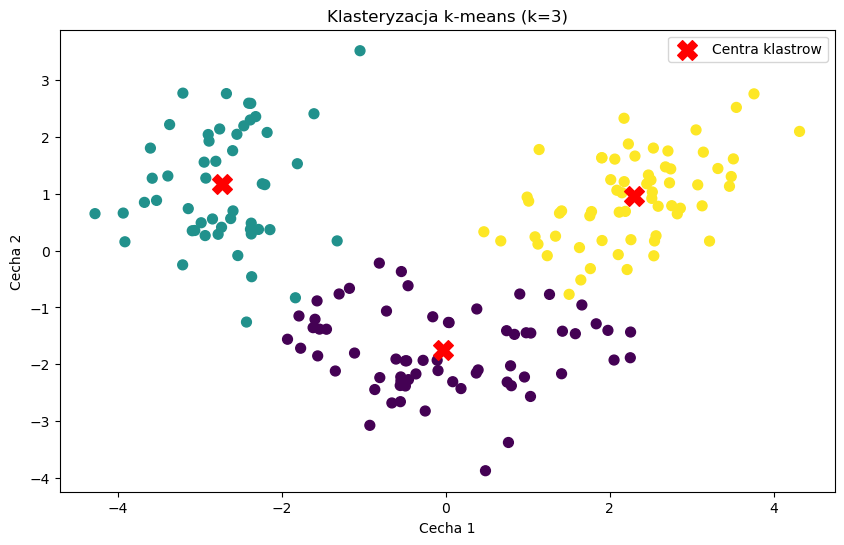

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

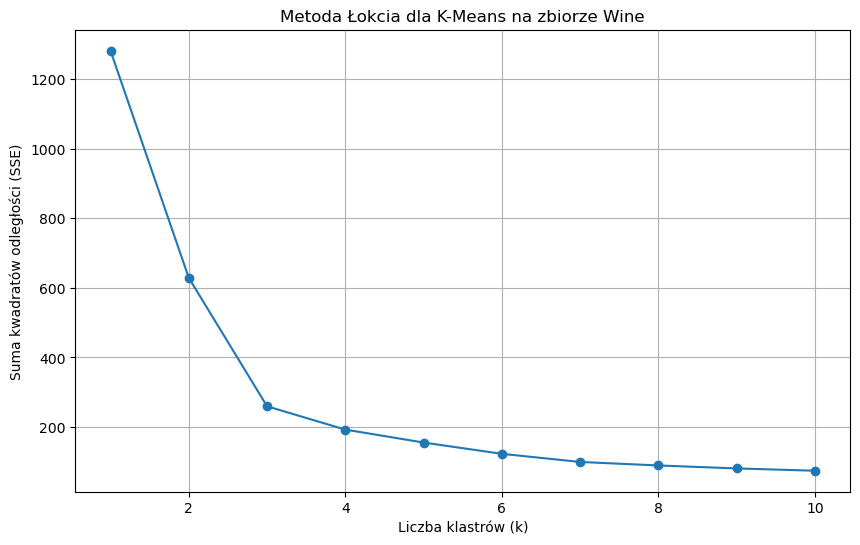

In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
data = wine.data
y = wine.target

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

# Klasteryzacja k-means
k = 3  # liczba klastrow
kmeans_initial = KMeans(n_clusters=k, random_state=42)
labels_initial = kmeans_initial.fit_predict(data_pca_2d)

# Wizualizacja wynikow
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans_initial.cluster_centers_[:, 0], kmeans_initial.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra klastrow')
plt.title(f'Klasteryzacja k-means (k={k})')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.show()

# 2. Przeprowadz analize dla roznych wartosci k. Wybierz optymalne k, korzystajac z metody "łokcia" (ang. elbow method).
sse = [] # Sum of squared errors
k_range = range(1, 11) # Testujemy k od 1 do 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Dodano n_init
    kmeans.fit(data_pca_2d)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Metoda Łokcia dla K-Means na zbiorze Wine')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Suma kwadratów odległości (SSE)')
plt.grid(True)
plt.show()

# Klasteryzacja hierarchiczna

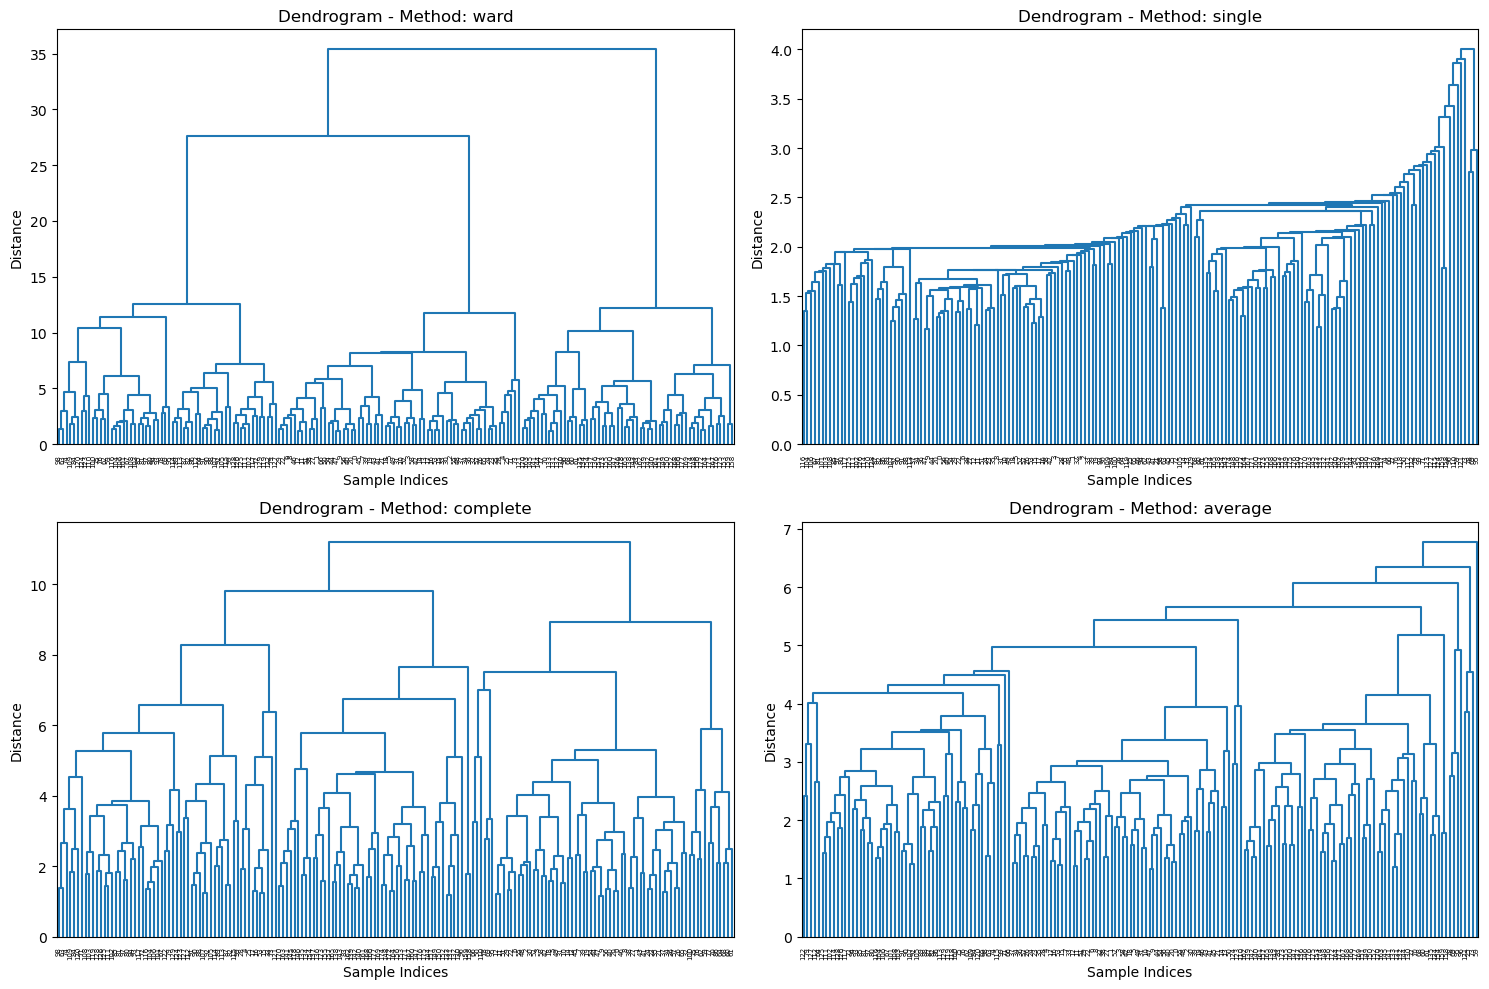

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


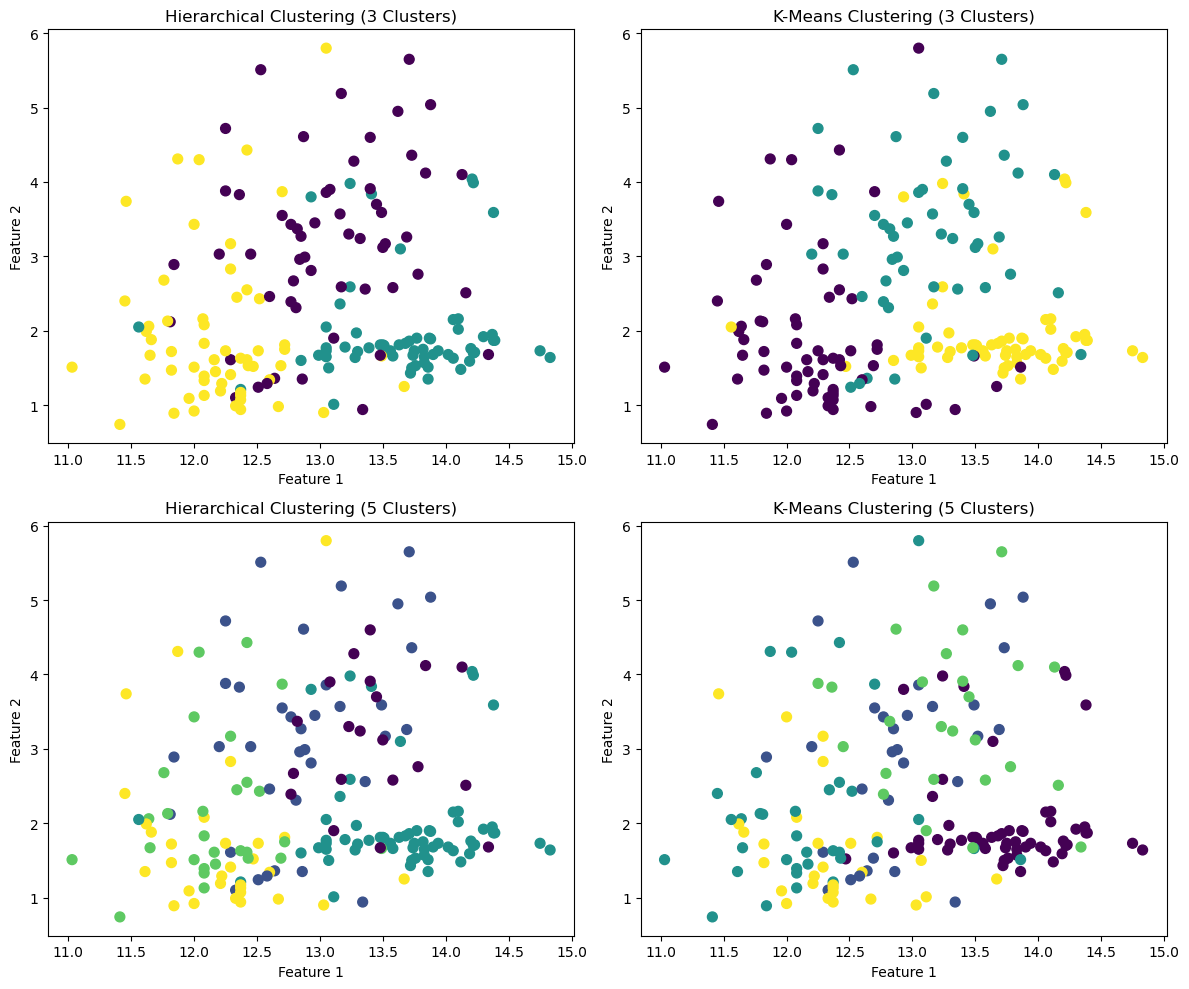

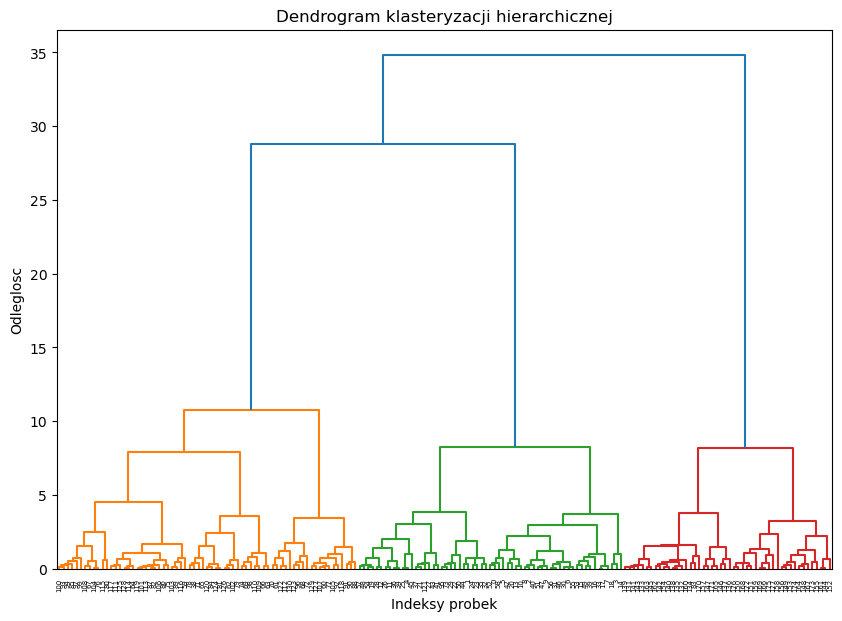

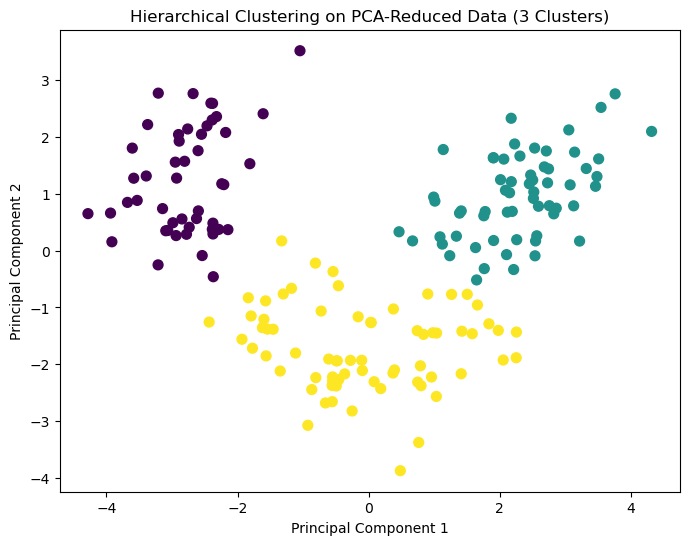

In [37]:
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wine = load_wine()
data = wine.data
y = wine.target

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

linkage_methods = ['ward', 'single', 'complete', 'average']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(data_scaled, method=method)
    # Visualize the dendrogram
    plt.subplot(2, 2, i + 1)
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=False, # Set to False for cleaner view with many points
               color_threshold=1.0) # Adjust threshold to see distinct branches
    plt.title(f'Dendrogram - Method: {method}')
    plt.xlabel('Sample Indices')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()


linked_ward = linkage(data_scaled, method='ward')
# --- Extracting 3 clusters from hierarchical clustering ---
clusters_h_3 = fcluster(linked_ward, t=3, criterion='maxclust')

# --- Performing K-means for 3 clusters ---
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init for robustness
clusters_km_3 = kmeans_3.fit_predict(data_scaled)

# --- Extracting 5 clusters from hierarchical clustering ---
clusters_h_5 = fcluster(linked_ward, t=5, criterion='maxclust')

# --- Performing K-means for 5 clusters ---
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters_km_5 = kmeans_5.fit_predict(data_scaled)

plt.figure(figsize=(12, 10))

# Plot for 3 clusters
plt.subplot(2, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=clusters_h_3, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=clusters_km_3, cmap='viridis', s=50)
plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot for 5 clusters
plt.subplot(2, 2, 3)
plt.scatter(data[:, 0], data[:, 1], c=clusters_h_5, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (5 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 4)
plt.scatter(data[:, 0], data[:, 1], c=clusters_km_5, cmap='viridis', s=50)
plt.title('K-Means Clustering (5 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

linked_reduced = linkage(data_pca_2d, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked_reduced, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram klasteryzacji hierarchicznej')
plt.xlabel('Indeksy probek')
plt.ylabel('Odleglosc')
plt.show()

clusters_reduced = fcluster(linked_reduced, t=3, criterion='maxclust')
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=clusters_reduced, cmap='viridis', s=50)
plt.title('Hierarchical Clustering on PCA-Reduced Data (3 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()